# Sesión 6: Evaluación del recurso eólico

In [ ]:
#Importación de librerías
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [ ]:
#Lectura e importación de datos
datos = pd.read_csv("M02_201912.txt", sep=" ", usecols=[0,1,2,3,4,5, 13], skiprows=[0,1,2], header=None, parse_dates=[[0,1,2,3,4]])
datos.columns=["Date","Vel_80", "Vel_60"]
datos.set_index("Date", inplace=True)
datos.index = pd.to_datetime(datos.index, format="%Y %m %d %H %M")
datos.head()

,Vel_80,Vel_60
Date,,
2019-12-01 00:00:00,6.9167,5.3128
2019-12-01 00:10:00,5.6143,4.1181
2019-12-01 00:20:00,5.2918,4.0479
2019-12-01 00:30:00,6.1105,4.7368
2019-12-01 00:40:00,6.3958,4.8008


## Método 1: Aproximación estadística

(array([0.02708428, 0.0529444 , 0.12868857, 0.18729466, 0.1686264 ,
        0.07650926, 0.02402391, 0.00979318, 0.00688583, 0.00137717]),
 array([ 0.21859 ,  1.682231,  3.145872,  4.609513,  6.073154,  7.536795,
         9.000436, 10.464077, 11.927718, 13.391359, 14.855   ]),
 <a list of 10 Patch objects>)

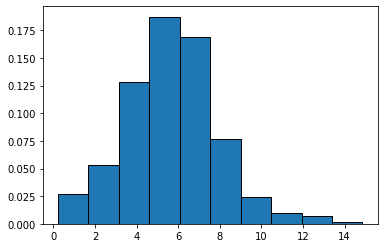

In [ ]:
#Histograma
plt.hist(datos.Vel_80, density=True, ec="k")

In [ ]:
#Ajuste de una FDP (Weibull)
x = np.linspace(datos.Vel_80.min(), datos.Vel_80.max(),1000) #Eje x, serie de velocidades de menor a mayor

par_weibull = stats.weibull_min.fit(datos.Vel_80) #Ajustar una FDP a la serie de datos, obtenemos los parámetros
p = stats.weibull_min.pdf(x, par_weibull[0], par_weibull[1], par_weibull[2]) #Evaluamos (creamos) la curva

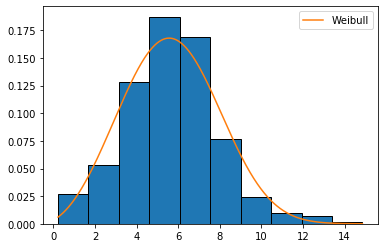

In [ ]:
# Histogramas y FDP
plt.hist(datos.Vel_80, density=True, ec="k")
plt.plot(x,p, label="Weibull")
plt.legend()

In [ ]:
nrel = pd.read_csv("NREL_pc.txt", sep=" ")

In [ ]:
nrel #Wind speeds [m/s], power[kw]

,WindSpeed,Power
0,0,0.0
1,1,0.0
2,2,0.0
3,3,40.5
4,4,177.7
5,5,403.9
6,6,737.6
7,7,1187.2
8,8,1771.1
9,9,2518.6


Text(0, 0.5, 'Potencia [kW]')

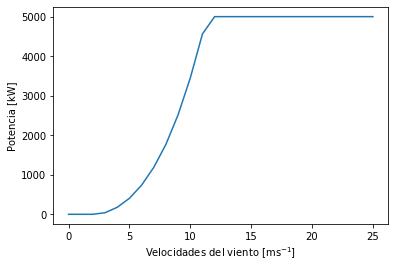

In [ ]:
plt.plot(nrel.Power)
plt.xlabel("Velocidades del viento [ms$^{-1}$]")
plt.ylabel("Potencia [kW]")

$$\overline{P_w} = \int_0^\infty P_w(U)p(U)dU$$

In [ ]:
np.arange(0,26,1)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25])

In [ ]:
prob = stats.weibull_min.pdf(np.arange(0,26,1), par_weibull[0], par_weibull[1], par_weibull[2])

In [ ]:
prob

array([3.39742961e-03, 2.18570489e-02, 5.50280014e-02, 9.72027489e-02,
       1.37764118e-01, 1.63721351e-01, 1.65351871e-01, 1.41918269e-01,
       1.02803608e-01, 6.21795498e-02, 3.09919990e-02, 1.25439292e-02,
       4.05841931e-03, 1.03239860e-03, 2.02996972e-04, 3.03167497e-05,
       3.37816775e-06, 2.75818983e-07, 1.62015260e-08, 6.72113331e-10,
       1.93278528e-11, 3.78113409e-13, 4.93800350e-15, 4.22397774e-17,
       2.32190401e-19, 8.04629985e-22])

In [ ]:
nrel["Probability"] = prob
pd.options.display.float_format = '{:.4f}'.format
nrel

,WindSpeed,Power,Probability,Horas,Energy
0,0,0.0000,0.0034,2.5277,0.0000
1,1,0.0000,0.0219,16.2616,0.0000
2,2,0.0000,0.0550,40.9408,0.0000
3,3,40.5000,0.0972,72.3188,2928.9132
4,4,177.7000,0.1378,102.4965,18213.6288
5,5,403.9000,0.1637,121.8087,49198.5279
6,6,737.6000,0.1654,123.0218,90740.8739
7,7,1187.2000,0.1419,105.5872,125353.1145
8,8,1771.1000,0.1028,76.4859,135464.1498
9,9,2518.6000,0.0622,46.2616,116514.4282


In [ ]:
nrel.Probability.sum()

1.000087726797435

In [ ]:
nrel["Horas"] = nrel.Probability*31*24

In [ ]:
nrel.Horas.sum()

744.0652687372916

In [ ]:
nrel["Energy"] = nrel.Horas*nrel.Power

In [ ]:
fdp_pow = nrel["Energy"].sum() #kWh

## Método 2: Uso directo de los datos

In [ ]:
fpt2 = np.poly1d(np.polyfit(np.arange(1,13,1),[0,0,40.5,177.7,403.9,737.6,1187.2,1771.1,2518.6,3448.4,4562.5,5000], deg=5))

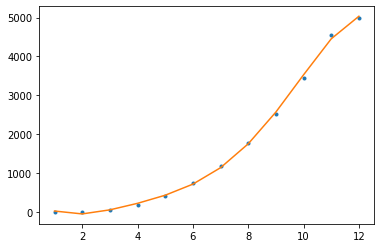

In [ ]:
plt.plot(np.arange(1,13,1), [0,0,40.5,177.7,403.9,737.6,1187.2,1771.1,2518.6,3448.4,4562.5,5000],'.')
plt.plot(np.arange(1,13,1), fpt2(np.arange(1,13,1)))

In [ ]:
def curva_aero_nrel(data):
    vel_turb = [] #Se van a guardar las potencias de salida
    for i in data:
        if i < 3: # Antes de de la velocidad de arranque
            vel_turb.append(0)
        elif i >= 3 and i <12: #Velocidad de arranque y la velocidad nominal
            vel_turb.append(fpt2(i))
        elif i >= 12 and i <= 25: #Velocidad nominal
            vel_turb.append(5000)
        else:
            vel_turb.append(0) #Después de la velocidad de corte
    return(vel_turb)

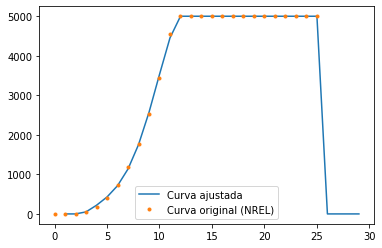

In [ ]:
plt.plot(np.arange(1,30,1), curva_aero_nrel(np.arange(1,30,1)), label="Curva ajustada")
plt.plot(nrel.Power, '.', label="Curva original (NREL)")
plt.legend()

In [ ]:
nrel_pow = curva_aero_nrel(datos.Vel_80)

In [ ]:
nrel_pow = sum(nrel_pow)/6

In [ ]:
print("Aproximación estadística =", fdp_pow )
print("Uso directo de los datos =", nrel_pow)

Aproximación estadística = 680326.7994358975
Uso directo de los datos = 662680.9870405451


In [ ]:
(fdp_pow-nrel_pow)/fdp_pow

0.02593725899080218